## Modelo de regressão linear simples ##

### Exercício: Treinar um modelo de regressão linear simples ###

Neste exercício, treinaremos um modelo de regressão linear simples para prever a temperatura corporal com base nas idades dos cães e interpretar o resultado.

In [20]:
#Carregando dados
#Vamos começar dando uma olhada em nossos dados.

!curl https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py -o graphing.py
!curl https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv -o doggy-illness.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 21511  100 21511    0     0  88049      0 --:--:-- --:--:-- --:--:-- 89257
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3293  100  3293    0     0  11790      0 --:--:-- --:--:-- --:--:-- 11845
100  3293  100  3293    0     0  11784      0 --:--:-- --:--:-- --:--:-- 11845


In [22]:
import pandas

# Converta em uma tabela usando Pandas
dataset = pandas.read_csv("doggy-illness.csv", delimiter="\t")

# Dados
dataset

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53
...,...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0,7.35
94,1,0,1.8,11,38.790426,1,1,12.18
95,0,0,6.6,20,39.489962,0,0,15.84
96,0,0,6.9,32,38.575742,1,1,9.79


O que é a biblioteca statsmodels?

A biblioteca statsmodels é uma ferramenta poderosa em Python utilizada para análise estatística de dados. Ela oferece uma ampla variedade de funções e modelos estatísticos, incluindo:

Regressão linear e não linear: Modelos para prever uma variável dependente com base em uma ou mais variáveis independentes.
Análise de séries temporais: Modelos para analisar dados coletados ao longo do tempo, como preços de ações ou temperatura.
Modelos lineares generalizados: Modelos para dados que não seguem uma distribuição normal, como dados de contagem ou binários.
Testes estatísticos: Uma variedade de testes para verificar hipóteses sobre dados, como testes de hipótese, testes de correlação e testes de heterocedasticidade.

In [23]:
!pip install statsmodels

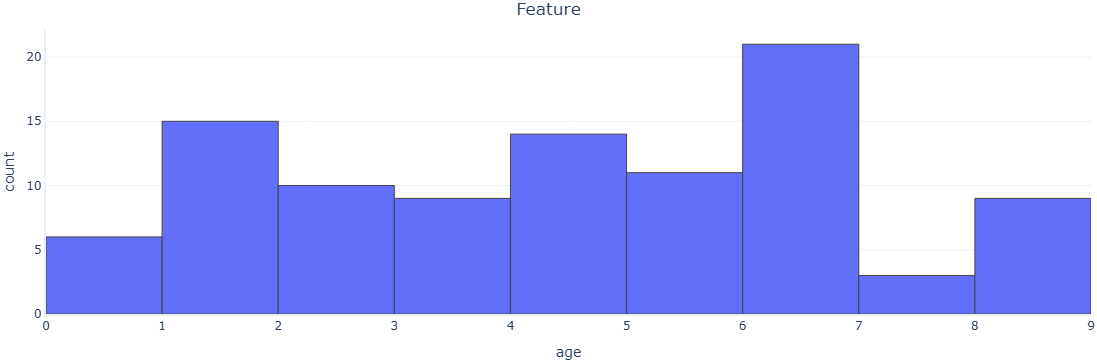

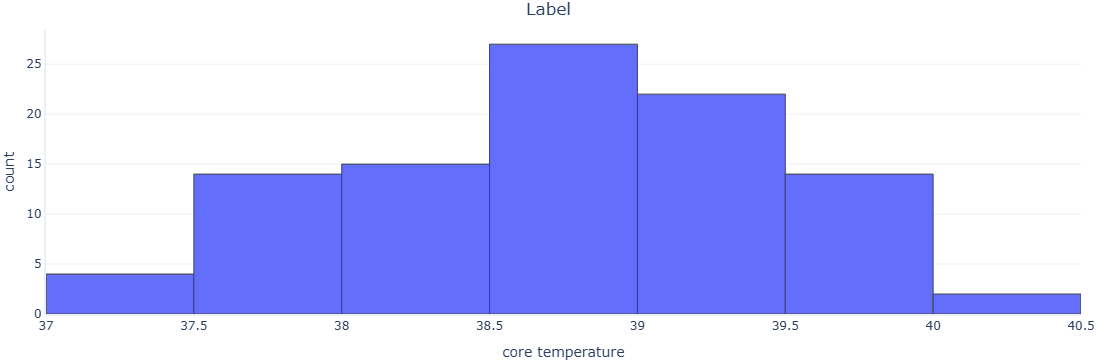

In [19]:
import graphing

graphing.histogram(dataset, label_x='age', nbins=10, title="Feature", show=True)
graphing.histogram(dataset, label_x='core_temperature', nbins=10, title="Label")

Olhando para o nosso recurso (idade), podemos ver que os cães tinham 9 anos ou menos de idade, e as idades são distribuídas uniformemente. Em outras palavras, nenhuma idade específica é substancialmente mais comum do que qualquer outra. 

Olhando para o nosso rótulo (core_temperature), a maioria dos cães parece ter uma temperatura interna ligeiramente elevada (normalmente esperaríamos ~37,5 graus Celsius), o que indica que eles não estão bem. Um pequeno número de cães tem uma temperatura acima de 40 graus, o que indica que eles não estão bem. 

Simplesmente porque a forma dessas distribuições é diferente, podemos supor que o recurso não será capaz de prever o rótulo extremamente bem. Por exemplo, se a velhice previsse perfeitamente quem teria uma temperatura alta, então o número de cães velhos corresponderia exatamente ao número de cães com uma temperatura alta. O modelo ainda pode acabar sendo útil, então vamos continuar. 

O próximo passo é avaliar a relação. Vamos traçar a relação entre os rótulos e os recursos.

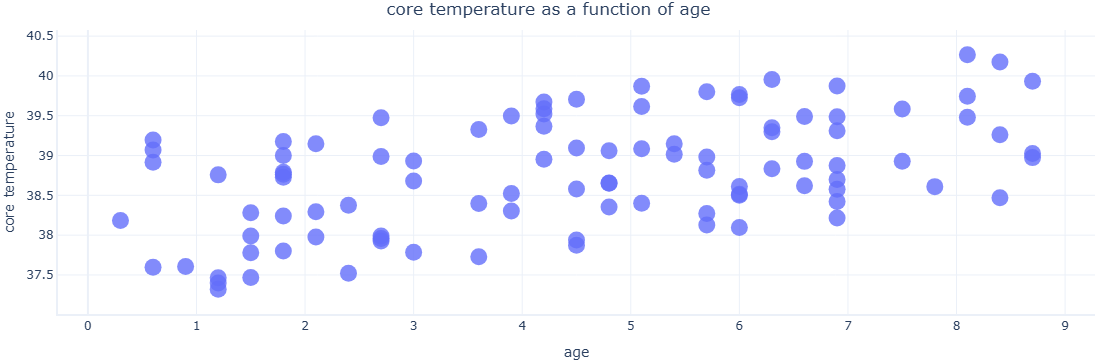

In [24]:
graphing.scatter_2D(dataset, label_x="age", label_y="core_temperature", title='core temperature as a function of age')

Parece que cães mais velhos tendem a ter temperaturas mais altas do que cães mais jovens. 

A relação é bem "barulhenta", no entanto; muitos cães da mesma idade têm temperaturas bem diferentes.

### Simple linear regression ###

Vamos examinar formalmente a relação entre nossos rótulos e recursos ajustando uma linha (modelo de regressão linear simples) ao conjunto de dados.

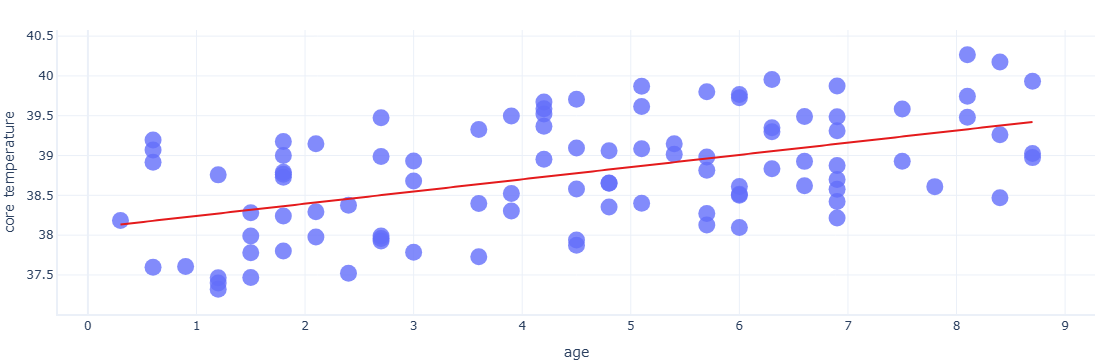

In [48]:
import statsmodels.formula.api as smf
import graphing # custom graphing code. See our GitHub repo for details

# Primeiro, definimos nossa fórmula usando uma sintaxe especial 
# Isso diz que a temperatura central é explicada pela idade
formula = "core_temperature ~ age"

# Executar regressão linear.
# Este método cuida de todo o procedimento de ajuste para nós.
model = smf.ols(formula = formula, data = dataset).fit()

# Mostrar um gráfico do resultado
graphing.scatter_2D( dataset
                   , label_x="age"
                   , label_y="core_temperature"
                   , trendline=lambda x: model.params['age'] * x + model.params['Intercept']
                    )

A linha parece se ajustar muito bem aos dados, validando nossa hipótese de que há uma correlação positiva entre a idade de um cão e sua temperatura corporal.

### Interpretando nosso modelo ###

Visualmente, a regressão linear simples é fácil de entender. Vamos recapitular o que os parâmetros significam, no entanto.

In [36]:
print("Intercept:", model.params[c], "Slope:", model.params['age'])

Intercept: 38.087867548892085 Slope: 0.15333957754731864


Lembre-se de que modelos de regressão linear simples são explicados pela interceptação da linha e pela inclinação da linha.

Aqui, nossa interceptação é de 38 graus Celsius. Isso significa que quando a idade é 0, o modelo irá prever 38 graus.

Nossa inclinação é de 0,15 graus Celsius, o que significa que para cada ano de idade, o modelo irá prever temperaturas 0,15 graus mais altas.

Na caixa a seguir, tente alterar a idade para alguns valores diferentes para ver previsões diferentes e compare-as com a linha no gráfico anterior.

In [54]:
def estimate_temperature(age):
    # Model param[0] is the intercepts and param[1] is the slope
    return age * model.params['age'] + model.params['Intercept']

print("Estimate temperature from age")
print(estimate_temperature(age=0))

Estimate temperature from age
38.087867548892085


In [56]:
print(estimate_temperature(age=40))

44.22145065078483
